In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from collections import Counter
from pylab import rcParams
rcParams['figure.figsize']=14,6 
%matplotlib inline
import seaborn as sns
%matplotlib inline
import math

In [2]:
#Ιmport the dataset
df_cargoships =pd.read_csv('cargo_data.csv', encoding= 'unicode_escape')

# Scenario 1 
## DBSCAN(eps=0.12, min_samples=25) using data for specific DESTINATION

In [3]:
# the unique destinations
print(pd.unique(df_cargoships['DESTINATION']))

['RAVENNA' 'GENOVA' 'CATANIA' 'LIVORNO' 'SALERNO' 'PATRA' 'LA VALLETTA'
 'USTICA' 'PALERMO' 'BARI' 'BRINDISI' 'TERRASINI' 'GEMLIK' 'MARGHERA'
 'LIMASSOL' 'PATRAS' 'CAGLIARI' 'MALTA' 'YALOVA' 'CAPRI' 'BAR'
 'CIVITAVECCHIA' 'LIVORNO #HIA' 'AUTOPORT' 'GENOV' 'RTO' 'PALER5' 'KOPER'
 'MONFALCONE' 'TRAPANI' 'PIRAEUS']


## Select Destination :

In [4]:
Destination = 'LIVORNO'

In [5]:
# leave only the data for the wanted destination
df_Destination = df_cargoships[df_cargoships['DESTINATION'].isin([Destination])]

In [6]:
dbscan_df_Destination = df_Destination[['LON','LAT']]
dbscan_df_Destination = dbscan_df_Destination.values.astype('float32',copy=False)

In [34]:
# create DBSCAN model
model_Destination = DBSCAN (eps=0.12, min_samples=25).fit(dbscan_df_Destination)

print(model_Destination)

DBSCAN(eps=0.12, min_samples=25)


In [35]:
#seprate the outliers from clusters
outliers = df_Destination[model_Destination.labels_== -1] # -1 for outleris

#set colors for you cluster  by assigned indexes pf cluster to your data 
colors = model_Destination.labels_ 

In [36]:
# How many clusters in the dataset using the model.labels_
clusters = Counter(model_Destination.labels_)
print(clusters)

Counter({0: 1206, -1: 681, 1: 433, 6: 281, 4: 154, 2: 146, 5: 90, 7: 26, 3: 25})


C:\Users\Stelios\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


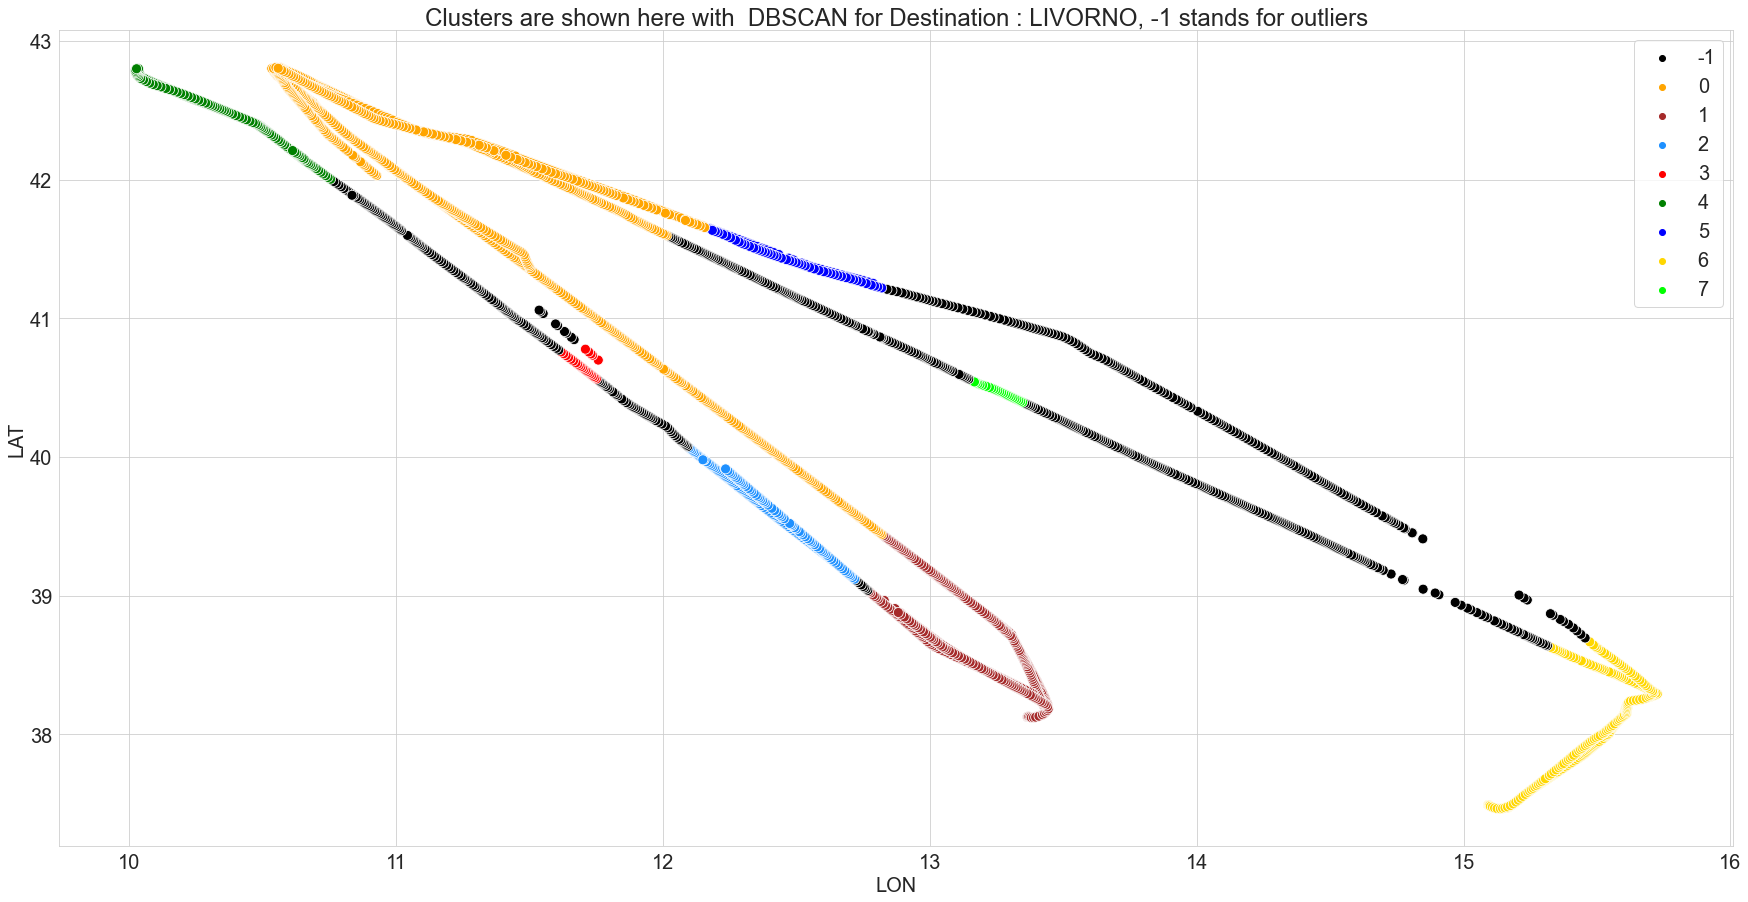

In [37]:
# Print results
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 20
plt.rcParams['figure.facecolor'] = '#00000000'

plt.figure(figsize=(30, 15))
title = "Clusters are shown here with  DBSCAN for Destination : %s, -1 stands for outliers"%(Destination)
plt.title(title)
# palet = ['green','orange','brown','dodgerblue','red', 'black','blue']
palet = ['black','orange','brown','dodgerblue','red', 'green','blue','gold','lime','slategrey','violet','pink','aqua','sienna','teal']
sns.scatterplot(df_Destination['LON'],df_Destination['LAT'], hue=colors, s=100,palette=palet[0:len(clusters)]);

C:\Users\Stelios\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


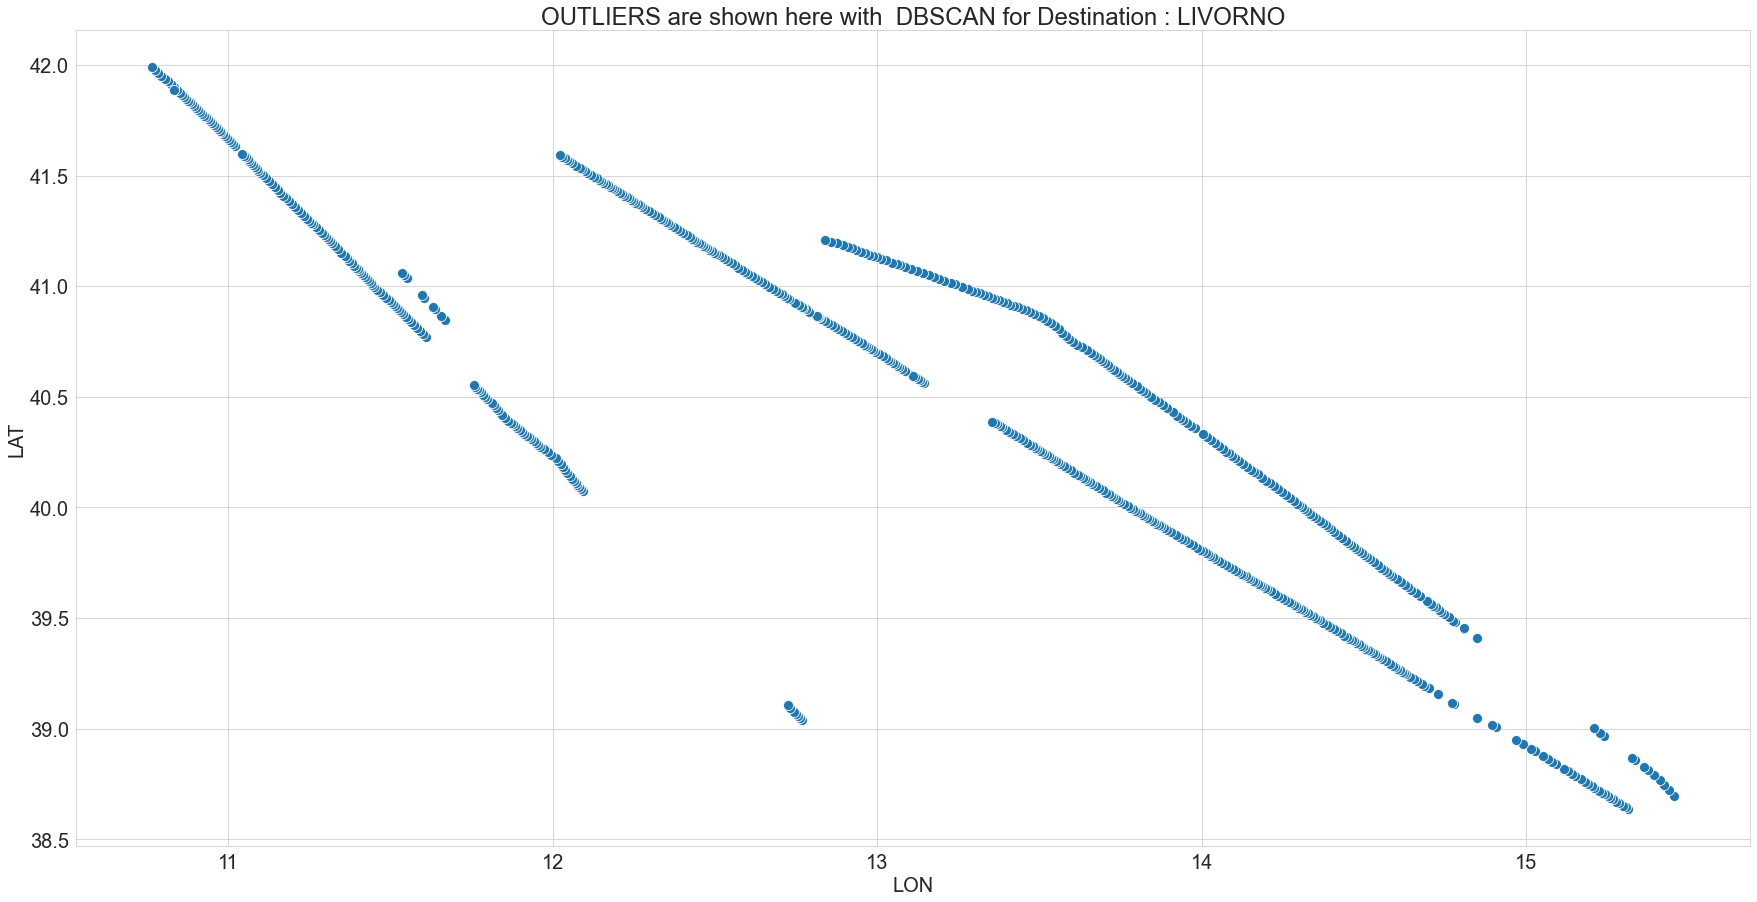

In [12]:
# Print outliers
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 20
plt.rcParams['figure.facecolor'] = '#00000000'

plt.figure(figsize=(30, 15))
title = "OUTLIERS are shown here with  DBSCAN for Destination : %s"%(Destination)
plt.title(title)
sns.scatterplot(outliers['LON'],outliers['LAT'],s=100);

## SCENARIO 2 
## DBSCAN(eps=0.2, min_samples=25) using data for specific DESTINATION and SHIP 

In [38]:
# the unique destinations
print(pd.unique(df_cargoships['DESTINATION']))

['RAVENNA' 'GENOVA' 'CATANIA' 'LIVORNO' 'SALERNO' 'PATRA' 'LA VALLETTA'
 'USTICA' 'PALERMO' 'BARI' 'BRINDISI' 'TERRASINI' 'GEMLIK' 'MARGHERA'
 'LIMASSOL' 'PATRAS' 'CAGLIARI' 'MALTA' 'YALOVA' 'CAPRI' 'BAR'
 'CIVITAVECCHIA' 'LIVORNO #HIA' 'AUTOPORT' 'GENOV' 'RTO' 'PALER5' 'KOPER'
 'MONFALCONE' 'TRAPANI' 'PIRAEUS']


## Select Destination :

In [39]:
Destination = 'LIVORNO'

In [44]:
# leave only the data for the wanted destination
df_Destination = df_cargoships[df_cargoships['DESTINATION'].isin([Destination])]

In [41]:
# the unique ships for the selected destination
print(pd.unique(df_Destination['SHIPNAME']))

['EUROCARGO SALERNO' 'EUROCARGO SAVONA' 'EUROCARGO ALEXANDRIA'
 'EUROCARGO MALTA' 'EUROCARGO LIVORNO' 'EUROCARGO VENEZIA']


## Select Ship :

In [42]:
Ship = 'EUROCARGO LIVORNO'

In [43]:
# leave only the data for the wanted ship/destination
df_Destination_Ship = df_Destination[df_Destination['SHIPNAME'].isin([Ship])]

In [46]:
dbscan_df_Destination_Ship = df_Destination_Ship[['LON','LAT']]
dbscan_df_Destination_Ship = dbscan_df_Destination_Ship.values.astype('float32',copy=False)

In [47]:
# create DBSCAN model
model_Destination_Ship = DBSCAN (eps=0.2, min_samples=25).fit(dbscan_df_Destination_Ship)

print(model_Destination_Ship)

DBSCAN(eps=0.2, min_samples=25)


In [48]:
#seprate the outliers from clusters
outliers = df_Destination_Ship[model_Destination_Ship.labels_== -1] # -1 for outleris

#set colors for you cluster  by assigned indexes pf cluster to your data 
colors = model_Destination_Ship.labels_ 

In [49]:
# How many clusters in the dataset using the model.labels_
clusters = Counter(model_Destination_Ship.labels_)
print(clusters)

Counter({0: 144, 1: 70, -1: 14})


C:\Users\Stelios\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


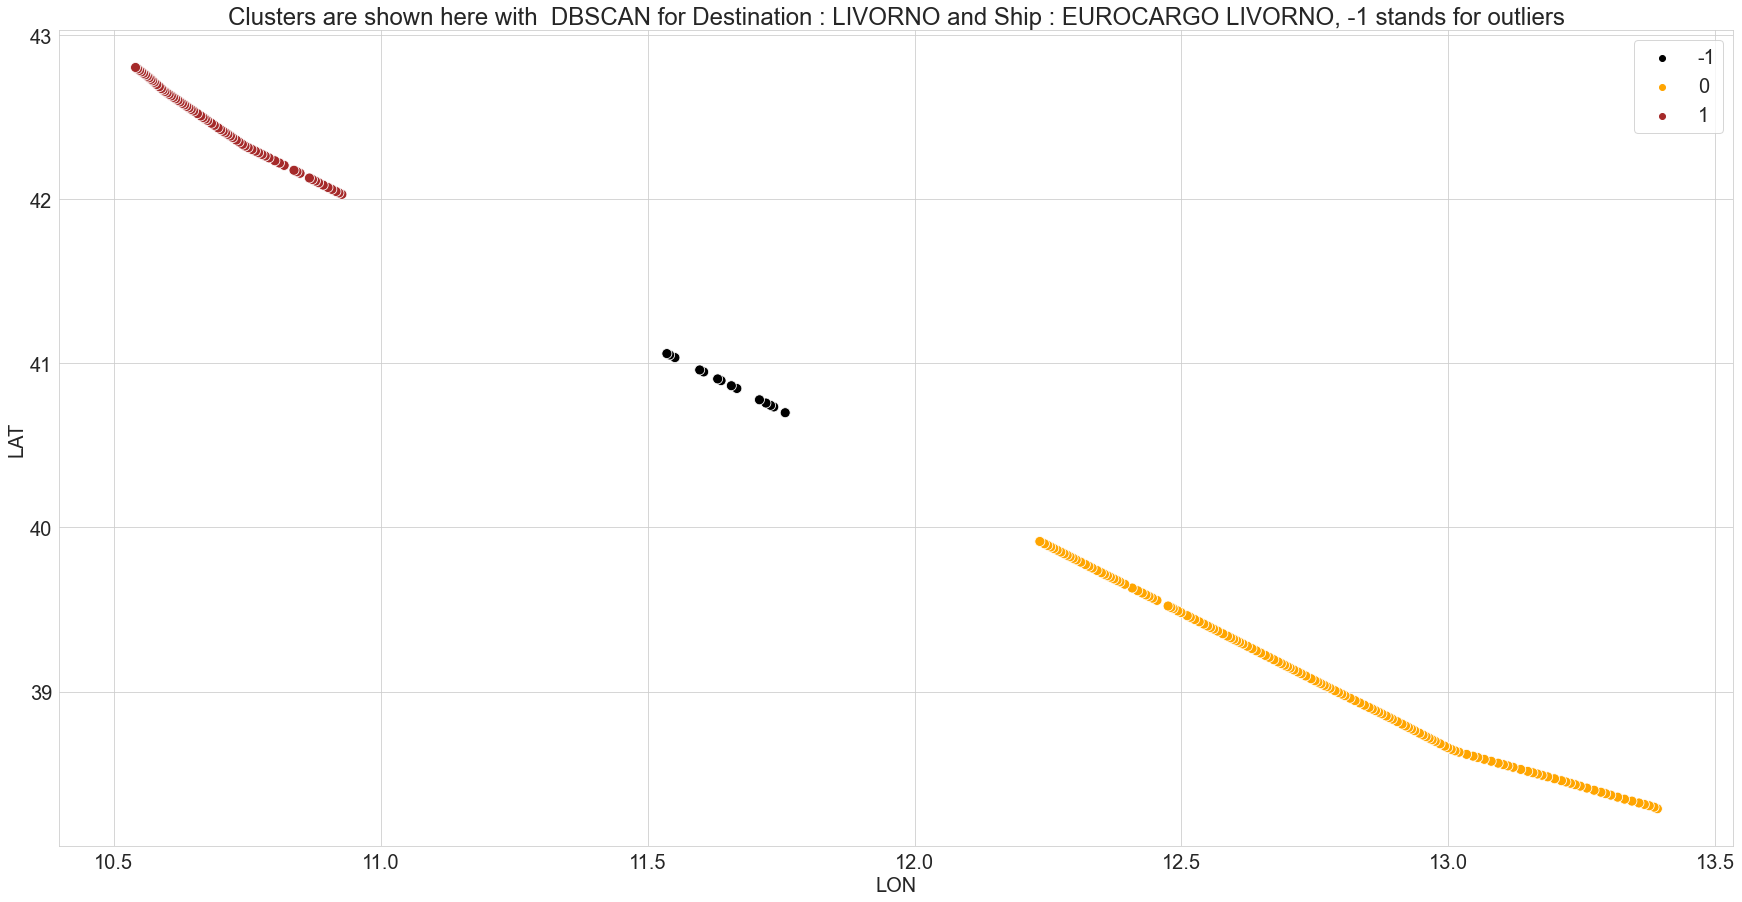

In [51]:
# Print results
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 20
plt.rcParams['figure.facecolor'] = '#00000000'

plt.figure(figsize=(30, 15))
title = "Clusters are shown here with  DBSCAN for Destination : %s and Ship : %s, -1 stands for outliers"%(Destination,Ship)
plt.title(title)
palet = ['black','orange','brown','dodgerblue','red', 'green','blue']
sns.scatterplot(df_Destination_Ship['LON'],df_Destination_Ship['LAT'], hue=colors, s=100,palette=palet[0:len(clusters)]);

## SCENARIO 3 
## DBSCAN(eps=0.13, min_samples=25) using data for specific AREA 

C:\Users\Stelios\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


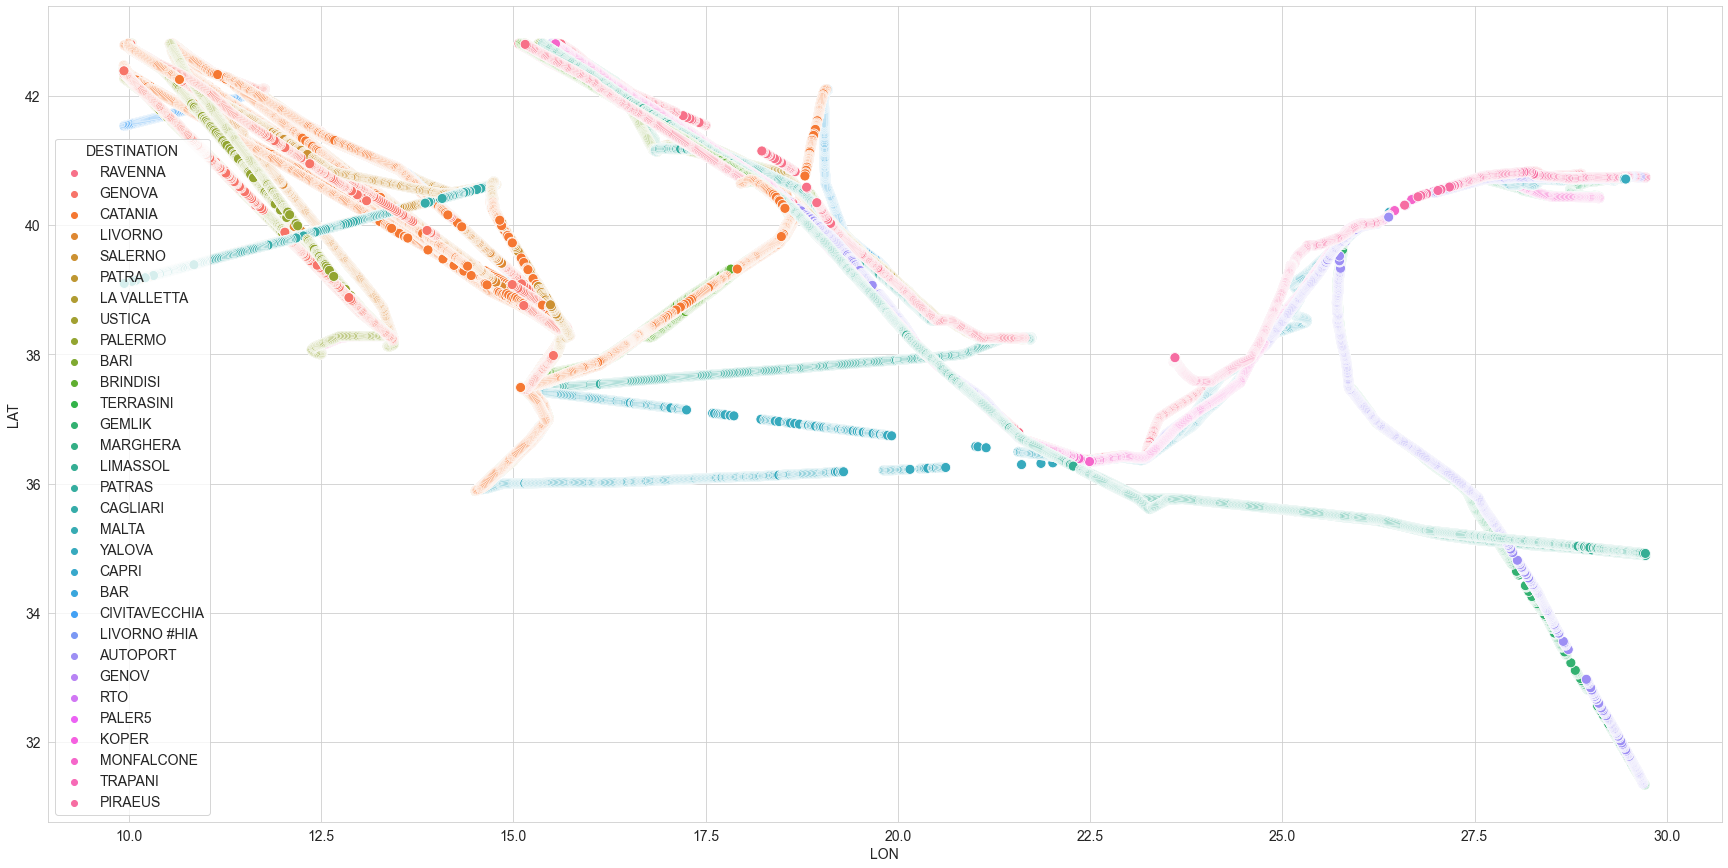

In [52]:
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 14
plt.rcParams['figure.facecolor'] = '#00000000'
plt.figure(figsize=(30, 15))
sns.scatterplot(df_cargoships['LON'],df_cargoships['LAT'], hue=df_cargoships['DESTINATION'], s=100);

In [53]:
# We will use LAT values from 36 to 42 and LON values from 15 to 20 

df_Area = df_cargoships[(df_cargoships['LAT']>= 36) & (df_cargoships['LAT']<= 42)]
df_Area = df_Area[(df_Area['LON']>= 15) & (df_Area['LON']<= 20)]

In [54]:
dbscan_df_Area = df_Area[['LON','LAT']]
dbscan_df_Area = dbscan_df_Area.values.astype('float32',copy=False)

In [76]:
# create DBSCAN model
model_Area = DBSCAN (eps=0.13, min_samples=25).fit(dbscan_df_Area)

print(model_Area)

DBSCAN(eps=0.13, min_samples=25)


In [77]:
#seprate the outliers from clusters
outliers = df_Area[model_Area.labels_== -1] # -1 for outleris

#set colors for you cluster  by assigned indexes pf cluster to your data 
colors = model_Area.labels_ 

In [78]:
# How many clusters in the dataset using the model.labels_
clusters = Counter(model_Area.labels_)
print(clusters)

Counter({0: 24715, -1: 826, 4: 100, 1: 52, 2: 27, 3: 25})


C:\Users\Stelios\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


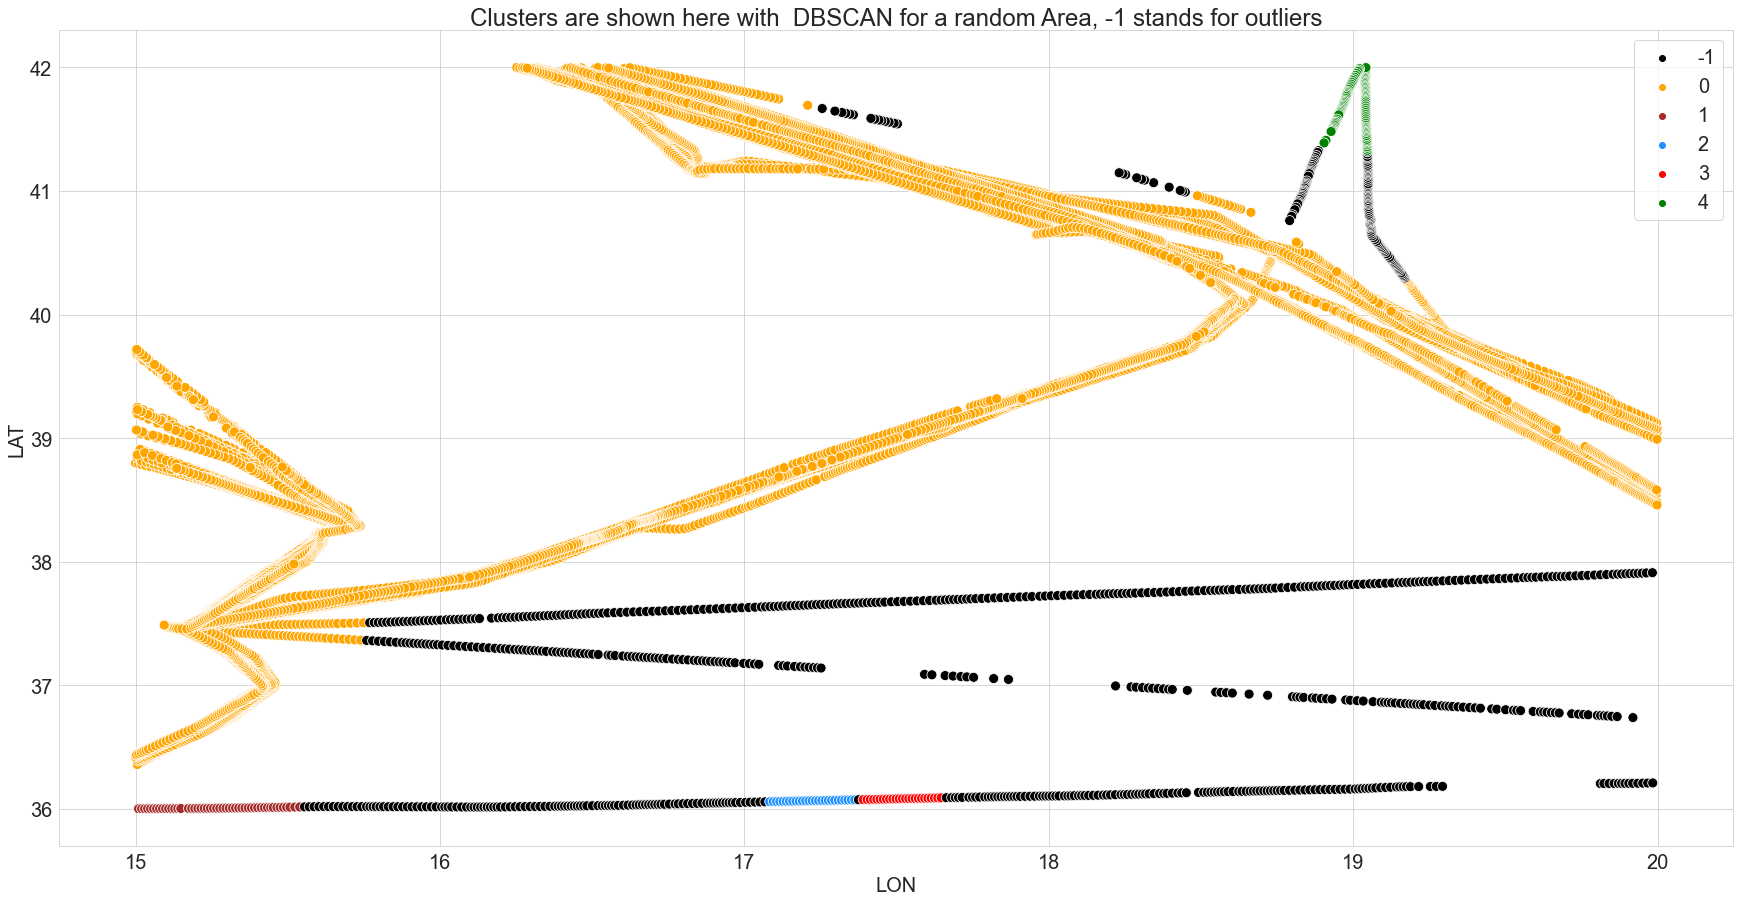

In [79]:
# Print results
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 20
plt.rcParams['figure.facecolor'] = '#00000000'

plt.figure(figsize=(30, 15))
title = "Clusters are shown here with  DBSCAN for a random Area, -1 stands for outliers"
plt.title(title)
palet = ['black','orange','brown','dodgerblue','red', 'green','blue']
sns.scatterplot(df_Area['LON'],df_Area['LAT'], hue=colors, s=100,palette=palet[0:len(clusters)]);

## SCENARIO 4
## DBSCAN with Custom Metric using data for specific DESTINATION 

In [81]:
#CREATE THE DATASET FOR LIVORNO DESTINATION AND SHIP EUROCARGO LIVORNO

df_custom = df_cargoships[df_cargoships['DESTINATION'].isin(['LIVORNO'])]

In [82]:
dbscan_df_custom = df_custom[['LON','LAT','SPEED','COURSE']]
dbscan_df_custom['LON'] = dbscan_df_custom['LON'].values.astype('float32',copy=False)
dbscan_df_custom['LAT'] = dbscan_df_custom['LAT'].values.astype('float32',copy=False)

C:\Users\Stelios\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Stelios\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [83]:
# margin for speed, space and course difference
speedDiff = 2.2
courseDiff = 2.2
spaceDiff = 0.12

In [100]:
# Α,Β = ['LON','LAT','SPEED','COURSE']
def custom_metric(A,B):
    
    Xa = A[0]
    Ya = A[1]
    Speeda = A[2]
    Coursea = A[3]
    
    Xb = B[0]
    Yb = B[1]
    Speedb = B[2]
    Courseb = B[3]
    
    # euclidean distance calculation
    dist = math.sqrt(((Xa - Xb))**2+((Ya - Yb))**2)/spaceDiff
    
    # speed difference calculation
    speed = abs((Speeda - Speedb)/speedDiff)
    
    # Course difference calculation
    course = abs((Coursea - Courseb)/courseDiff)
             
    result = dist + speed + course
    
    return result

In [101]:
#CREATE THE MODEL
eps_custom = spaceDiff + courseDiff + speedDiff

model_Custom = DBSCAN(eps=eps_custom, min_samples=25, metric = custom_metric).fit(dbscan_df_custom)

print(model_Custom)

DBSCAN(eps=4.5200000000000005,
       metric=<function custom_metric at 0x000001C0222C67B8>, min_samples=25)


In [103]:
# How many clusters in the dataset using the model.labels_
clusters = Counter(model_Custom.labels_)

#set colors for you cluster  by assigned indexes pf cluster to your data 
colors = model_Custom.labels_ 

print(clusters)

Counter({2: 1362, 6: 538, -1: 291, 4: 188, 10: 144, 9: 121, 1: 84, 3: 81, 5: 59, 7: 52, 0: 50, 11: 39, 8: 33})


In [104]:
outliers_custom_metric = df_custom[model_Custom.labels_== -1]

In [105]:
outliers_custom_metric

,MMSI,IMO,LAT,LON,COURSE,HEADING,SPEED,TIMESTAMP,SHIPNAME,TYPE_NAME,DESTINATION
4,229706000,9175494,42.32190,11.14348,305,304,155,2015-08-01 00:01:57,EUROCARGO SALERNO,Ro-Ro Cargo,LIVORNO
10,229706000,9175494,42.32692,11.13338,304,304,155,2015-08-01 00:04:03,EUROCARGO SALERNO,Ro-Ro Cargo,LIVORNO
15,229706000,9175494,42.33175,11.12365,303,304,156,2015-08-01 00:06:03,EUROCARGO SALERNO,Ro-Ro Cargo,LIVORNO
21,229706000,9175494,42.33667,11.11402,306,305,156,2015-08-01 00:08:03,EUROCARGO SALERNO,Ro-Ro Cargo,LIVORNO
27,229706000,9175494,42.34225,11.10353,305,306,157,2015-08-01 00:10:14,EUROCARGO SALERNO,Ro-Ro Cargo,LIVORNO
...,...,...,...,...,...,...,...,...,...,...,...
51175,247297200,9465552,42.40884,10.97639,304,302,202,2015-08-14 23:29:16,EUROCARGO VENEZIA,Ro-Ro Cargo,LIVORNO
51181,247297200,9465552,42.41539,10.96328,304,302,202,2015-08-14 23:31:22,EUROCARGO VENEZIA,Ro-Ro Cargo,LIVORNO
51186,247297200,9465552,42.42076,10.95256,304,303,202,2015-08-14 23:33:04,EUROCARGO VENEZIA,Ro-Ro Cargo,LIVORNO
51193,247297200,9465552,42.42705,10.94003,304,303,202,2015-08-14 23:35:04,EUROCARGO VENEZIA,Ro-Ro Cargo,LIVORNO


C:\Users\Stelios\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


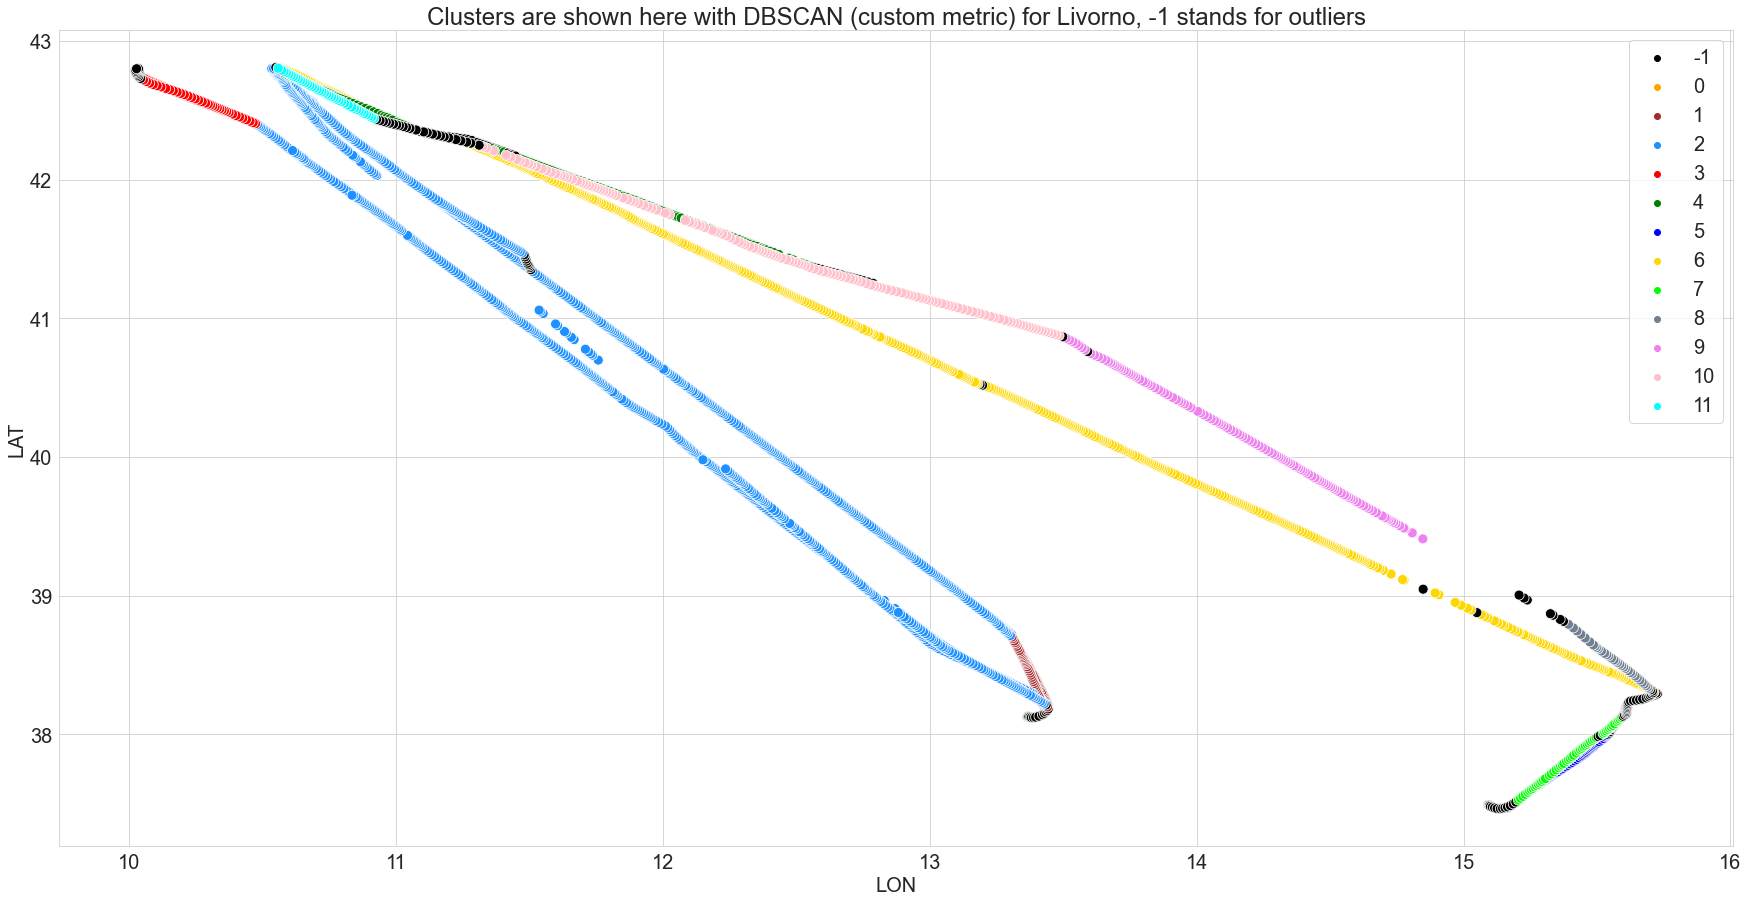

In [106]:
# Print results
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 20
plt.rcParams['figure.facecolor'] = '#00000000'
plt.figure(figsize=(30, 15))
plt.title("Clusters are shown here with DBSCAN (custom metric) for Livorno, -1 stands for outliers")
palet = ['black','orange','brown','dodgerblue','red', 'green','blue','gold','lime','slategrey','violet','pink','aqua','sienna','teal','purple','olive','tan']
sns.scatterplot(df_custom['LON'],df_custom['LAT'], hue=colors, s=100,palette=palet[0:len(clusters)]);